# colors

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1) Named Colors

### base & tableau

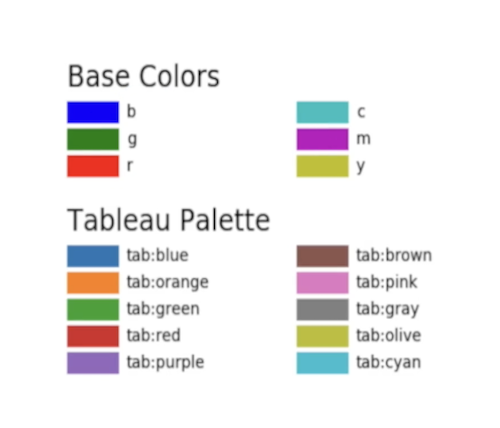

### CSS
1. 파스텔 톤 색상을 사용하거나
2. 일반 색상 투명도(alpha)를 조절하거나

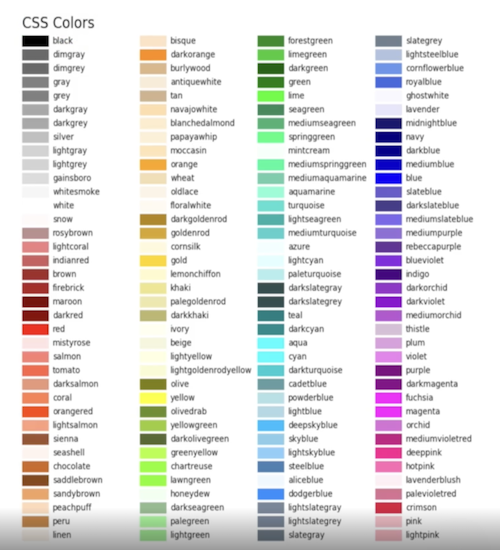

### 연습문제
- fontdict 만들기

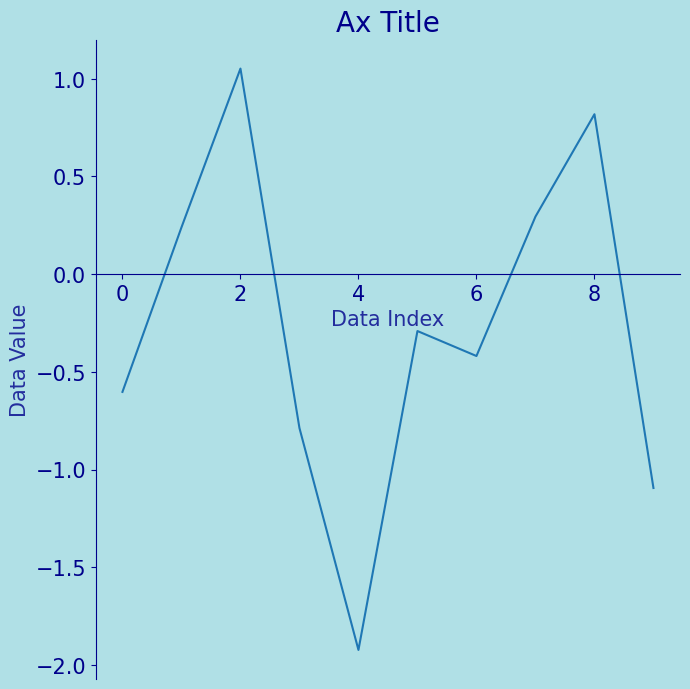

In [2]:
title_fontdict = {'fontsize': 20, 'color': 'darkblue'}
label_fontdict = {'fontsize':15, 'color': 'darkblue', 'alpha': .8}

# fig, ax 객체의 facecolor는 동일하게 설정!
fig = plt.figure(figsize=(7, 7), facecolor='powderblue')
ax = fig.add_subplot(facecolor='powderblue')

ax.set_title('Ax Title', fontdict=title_fontdict)
ax.set_xlabel('Data Index', fontdict=label_fontdict)
ax.set_ylabel('Data Value', fontdict=label_fontdict)

ax.tick_params(labelsize=15, colors='darkblue')

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['left', 'bottom']:
        spine.set_color('darkblue')
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc == 'bottom':
        spine.set_position(('data', 0))

test_np = np.random.normal(0, 1, (10, ))
ax.plot(test_np)

fig.tight_layout()

## 2) RGB

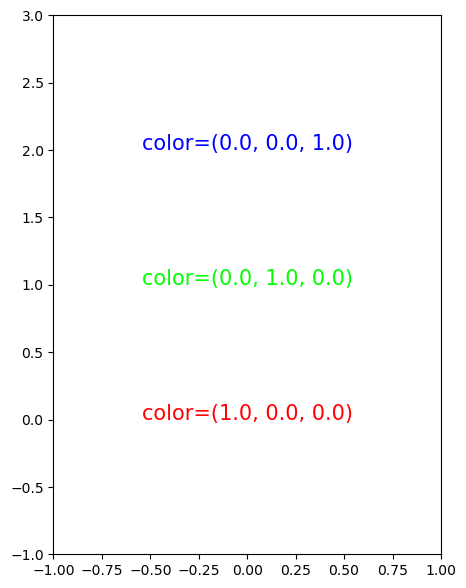

In [3]:
colors = [(1., 0., 0.), (0., 1., 0.), (0., 0., 1.)]

fig, ax = plt.subplots(figsize=(5, 7))

ax.set_xlim([-1, 1])
ax.set_ylim([-1, len(colors)])

for c_idx, c in enumerate(colors):
    c_str_list = [c for c in str(c)]
    c_str = ''.join(c_str_list)
    ax.text(0, c_idx,
           'color=' + c_str,
           fontsize=15,
           ha='center',
           color=c)

Text(0.5, 1.0, 'Ax Title')

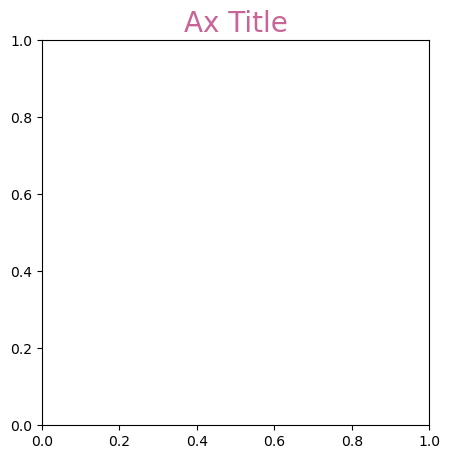

In [4]:
# RGB 인자로 0과 1 사이의 값을 전달하기 위한 함수
def convert255to1(*RGB255):
    color = [c/255 for c in RGB255]
    return color

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Ax Title', fontsize=20, color=convert255to1(200, 100, 150))

## 3) Colormaps
- 미리 정의된 색상 sequence를 이용한다.
    - continuous 타입
    - discrete 타입
- 참고
    - https://matplotlib.org/stable/tutorials/colors/colormaps.html
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.get_cmap.html

### binary classification
ex) 합격/불합격: 불합격의 정도가 높으면 완전 붉은색, 합격의 정도가 높으면 완전 푸른색

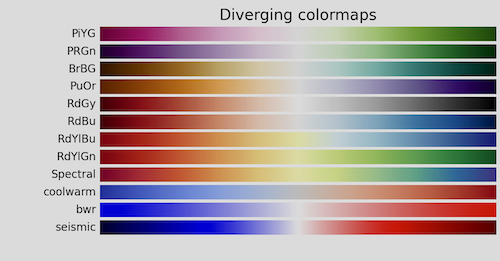

### discrete 타입
- 그룹별 색상을 지정할 때 사용한다. (이산형 자료)
- 참고 https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.get_cmap

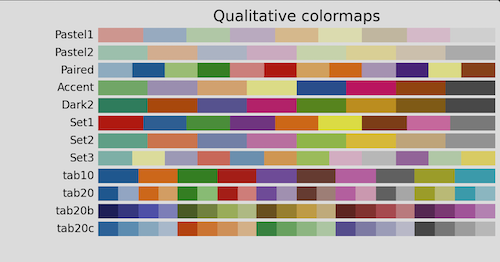

In [5]:
cmap = plt.get_cmap('tab10')
cmap_len = len(cmap.colors)

# 정해진 개수 만큼만 출력하는 경우
for c_idx in range(cmap_len):
    print(cmap(c_idx))
    
print('====================================================================')
    
# 정해진 개수 이상을 출력하는 경우?
# 마지막 값을 계속해서 출력한다.
for c_idx in range(cmap_len + 3):
    print(cmap(c_idx))

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)
(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0)
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)
(0.5490196078431373, 0.337

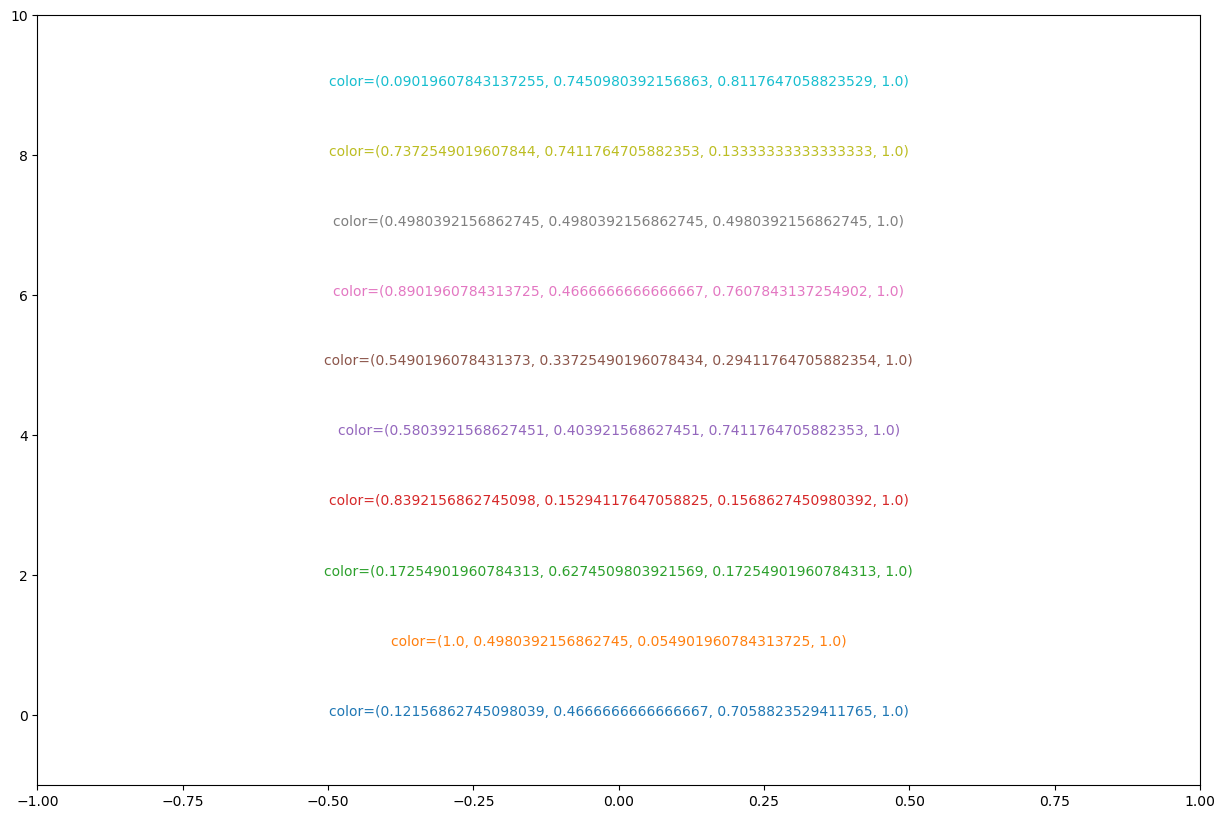

In [6]:
cmap = plt.get_cmap('tab10')
cmap_len = len(cmap.colors)

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlim([-1, 1])
ax.set_ylim([-1, cmap_len])

for c_idx in range(cmap_len):
    # cmap은 함수다!
    color = cmap(c_idx)
    c_str_list = [c for c in str(color)]
    c_str = ''.join(c_str_list)
    
    ax.text(0, c_idx, 'color=' + c_str,
           fontsize=10, ha='center', color=color)
    
# 꿀팁! 각 색상의 정보가 담겨 있는 리스트를 만들 수 있다.
colors = [cmap(c_idx) for c_idx in range(cmap_len)]

### continuous 타입
- 색이 연속적이기 때문에 몇 개로 나눌지 설정해야 한다.
    - 매개변수 lut

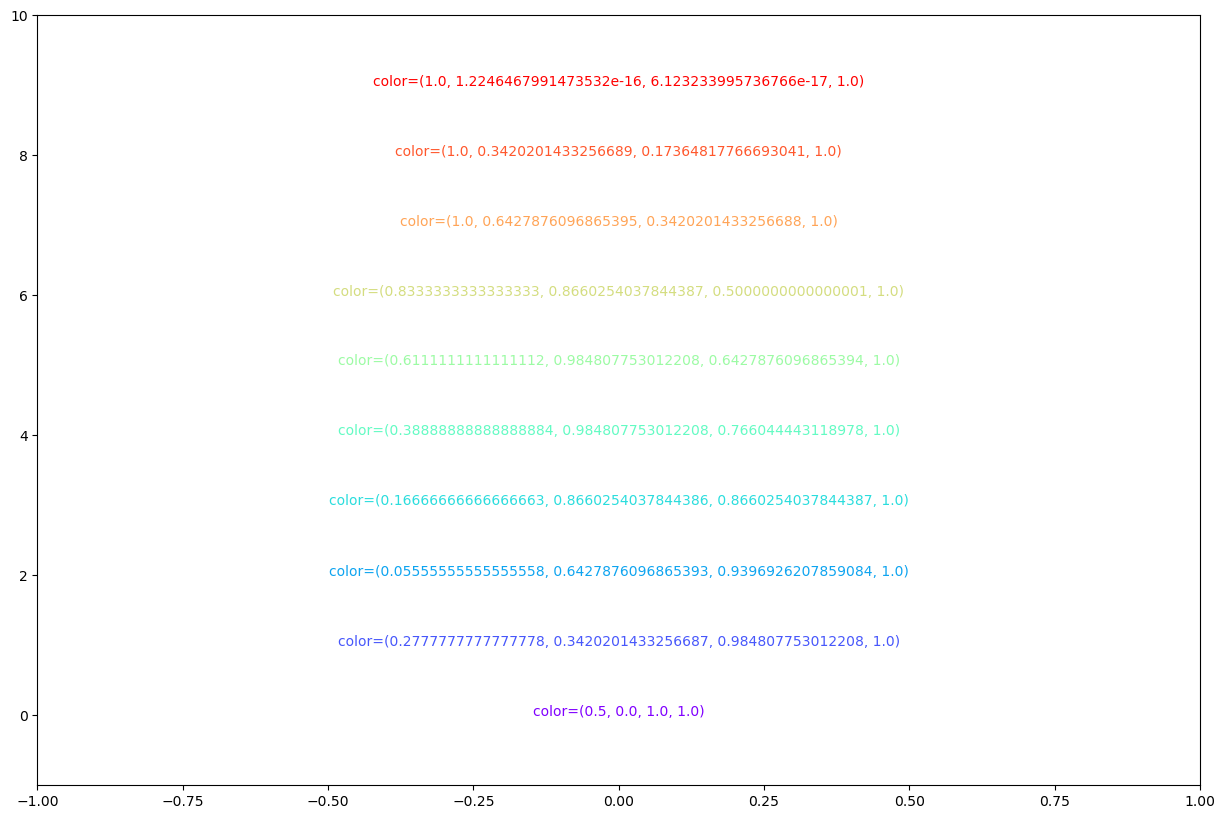

In [7]:
n_color = 10
cmap = plt.get_cmap('rainbow', lut=n_color)

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_xlim([-1, 1])
ax.set_ylim([-1, n_color])

for c_idx in range(n_color):
    color = cmap(c_idx)
    c_str_list = [c for c in str(color)]
    c_str = ''.join(c_str_list)
    
    ax.text(0, c_idx, 'color=' + c_str,
           fontsize=10, ha='center', color=color)

## 4) Auto Colormaps
- 매개변수로 cmap을 지원하는 API들이 있다.
    - ex) imshow 메서드

## 5) Colorbar
- when? 색상별 정확한 수치를 알지 못할 때 사용한다.
- fig.colorbar(<plot 변수명>)
- tick, ticklabel, ticklocation도 설정 가능하다.
    - ticklocation은 colorbar 함수의 ax 매개변수로 설정 가능하다.

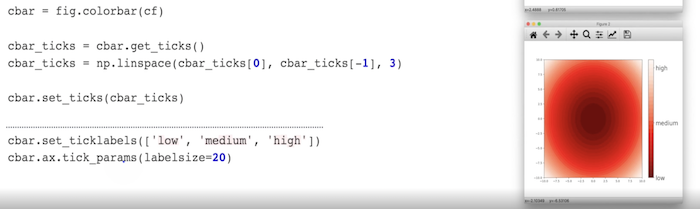